In [16]:
from test_beta_package import *
%matplotlib inline

In [17]:
# general check of the folder structure and assign variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()

In [18]:
#load the pickle files and assign dictionary to variables
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder,  # mat_file="diana_chasing2_notreheaded.mat")
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


the continous dictionary is dict_keys(['output_file_prefix', 'exist_animal2', 'startaltbins', 'endaltbins', 'settings', 'session_indicator', 'frame_times', 'time_bins', 'framerate', 'overall_framerate', 'session_ts', 'tracking_ts', 'cell_names', 'cell_activities', 'dxs', 'dys', 'animal_location', 'possiblecovariates', 'possiblecovariatesnames', 'possiblecovariatesbounds', 'possiblecovariatesbins'])
the binned dictionary is dict_keys(['framerate', 'settings', 'cell_names', 'spk_mat', 'features_mat'])
the binned dictionary is [0. 0. 0. ... 0. 0. 0.]


In [19]:
# obtain the information and save them for further processing
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)

In [42]:
# assign values to the model's parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=200,
                                 tolerance=10**-5, num_indep_neurons=2, num_predictors=5, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="standard", optim_method="em")

In [43]:
# extract the indices and totaltime from spike trains. With this function you select "num_indep_neurons" cells randomly
cell_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')


the iloc is imec0_cl0143_ch021


In [44]:
%%capture cap --no-stderr 
# processing of data and creation of instances for the inference
glmhmms_ista, process_neur, inputs_list, T_list, tot_masked_indices_list, path_plots_list, plots_folder = \
    data_structure(path_info_dir, path_analysis_dir, path_single_pred_dir, data_continous_ratemaps, data_binned_glm,
                   dict_param,
                   tot_time, cell_index, predictors_name_list, predictor_file="test_predictors.csv")

In [45]:
# fitting section, where you run the inference
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                                                       inputs_list=inputs_list)

0


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 0 is 33.86803078651428
1


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 1 is 32.7515869140625
2


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 2 is 1.0376598834991455
3


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 3 is 1.1022531986236572
4


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 4 is 31.925716638565063
0


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 5 is 30.62503480911255
1


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 6 is 23.437575817108154
2


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 7 is 12.340843677520752
3


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 8 is 27.634594440460205
4


  0%|          | 0/200 [00:00<?, ?it/s]

computation time loop 9 is 31.876131772994995
The total time for the inference is 226.6150496006012
the input list after inference is (73132, 2)


In [46]:
# post analysis processing. Here you obtain the posterior probabilities list with structure described in the code
posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param=dict_param,
                                              glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                              inputs_list=inputs_list)

Total computation time for posterior probability is 1.9643733501434326


In [47]:
# further processing of posterior to get the total occupancy for each state
states_occupancies = states_occupancies_computation(path_analysis_dir, posterior_probs_list)

In [48]:
# Below s a sample of plots

2 5
2
<class 'numpy.ndarray'>
3
<class 'numpy.ndarray'>


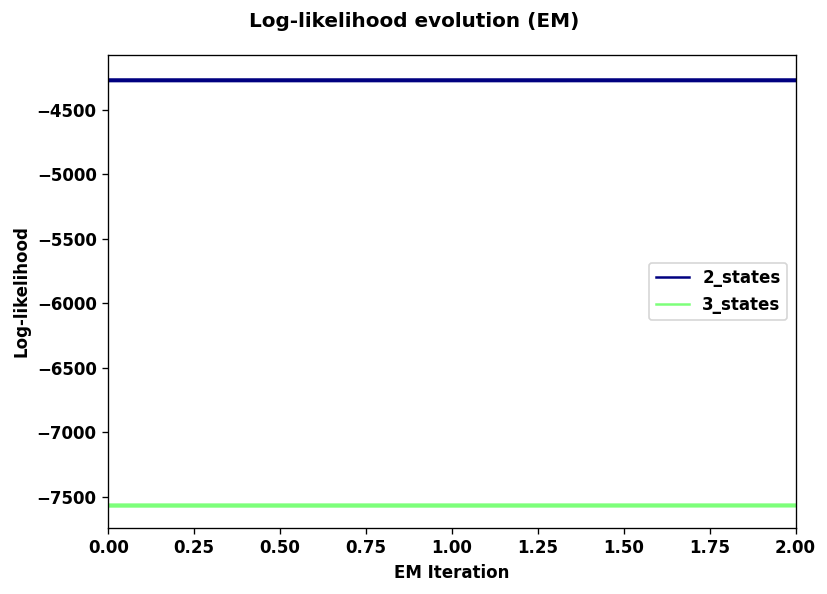

In [49]:
log_like_evolution_per_states(path_analysis_dir, path_info_dir, dict_objects=0, dict_processed_objects=0,
                              dictionary_information=0)

3
<class 'numpy.ndarray'>


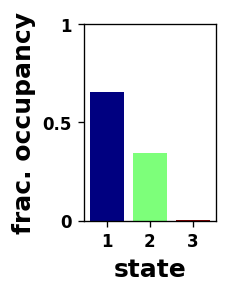

In [50]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=dict_param,
                             states_occupancies=states_occupancies)

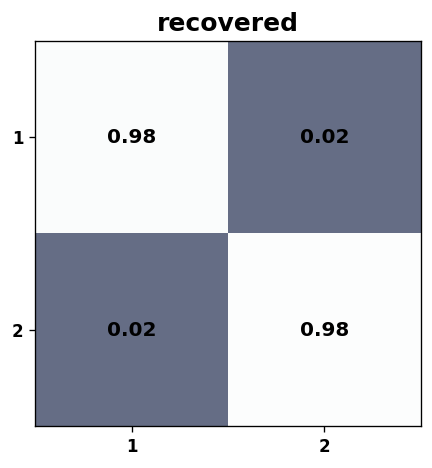

In [51]:
transition_prob_matrix(path_analysis_dir, path_info_dir, glmhmms_ista=glmhmms_ista, dict_param=dict_param)

inferred and transformed weights are {'2_states': [array([[[0.50091096, 0.97805345]],

       [[0.50814463, 0.99747621]]]), array([[[0.48783122, 0.99788363]],

       [[0.50859646, 0.97076732]]])], '3_states': [array([[[0.4988067 , 0.98934044]],

       [[0.49901047, 0.98939201]]]), array([[[0.50186891, 0.98929604]],

       [[0.502465  , 0.98977185]]])]}


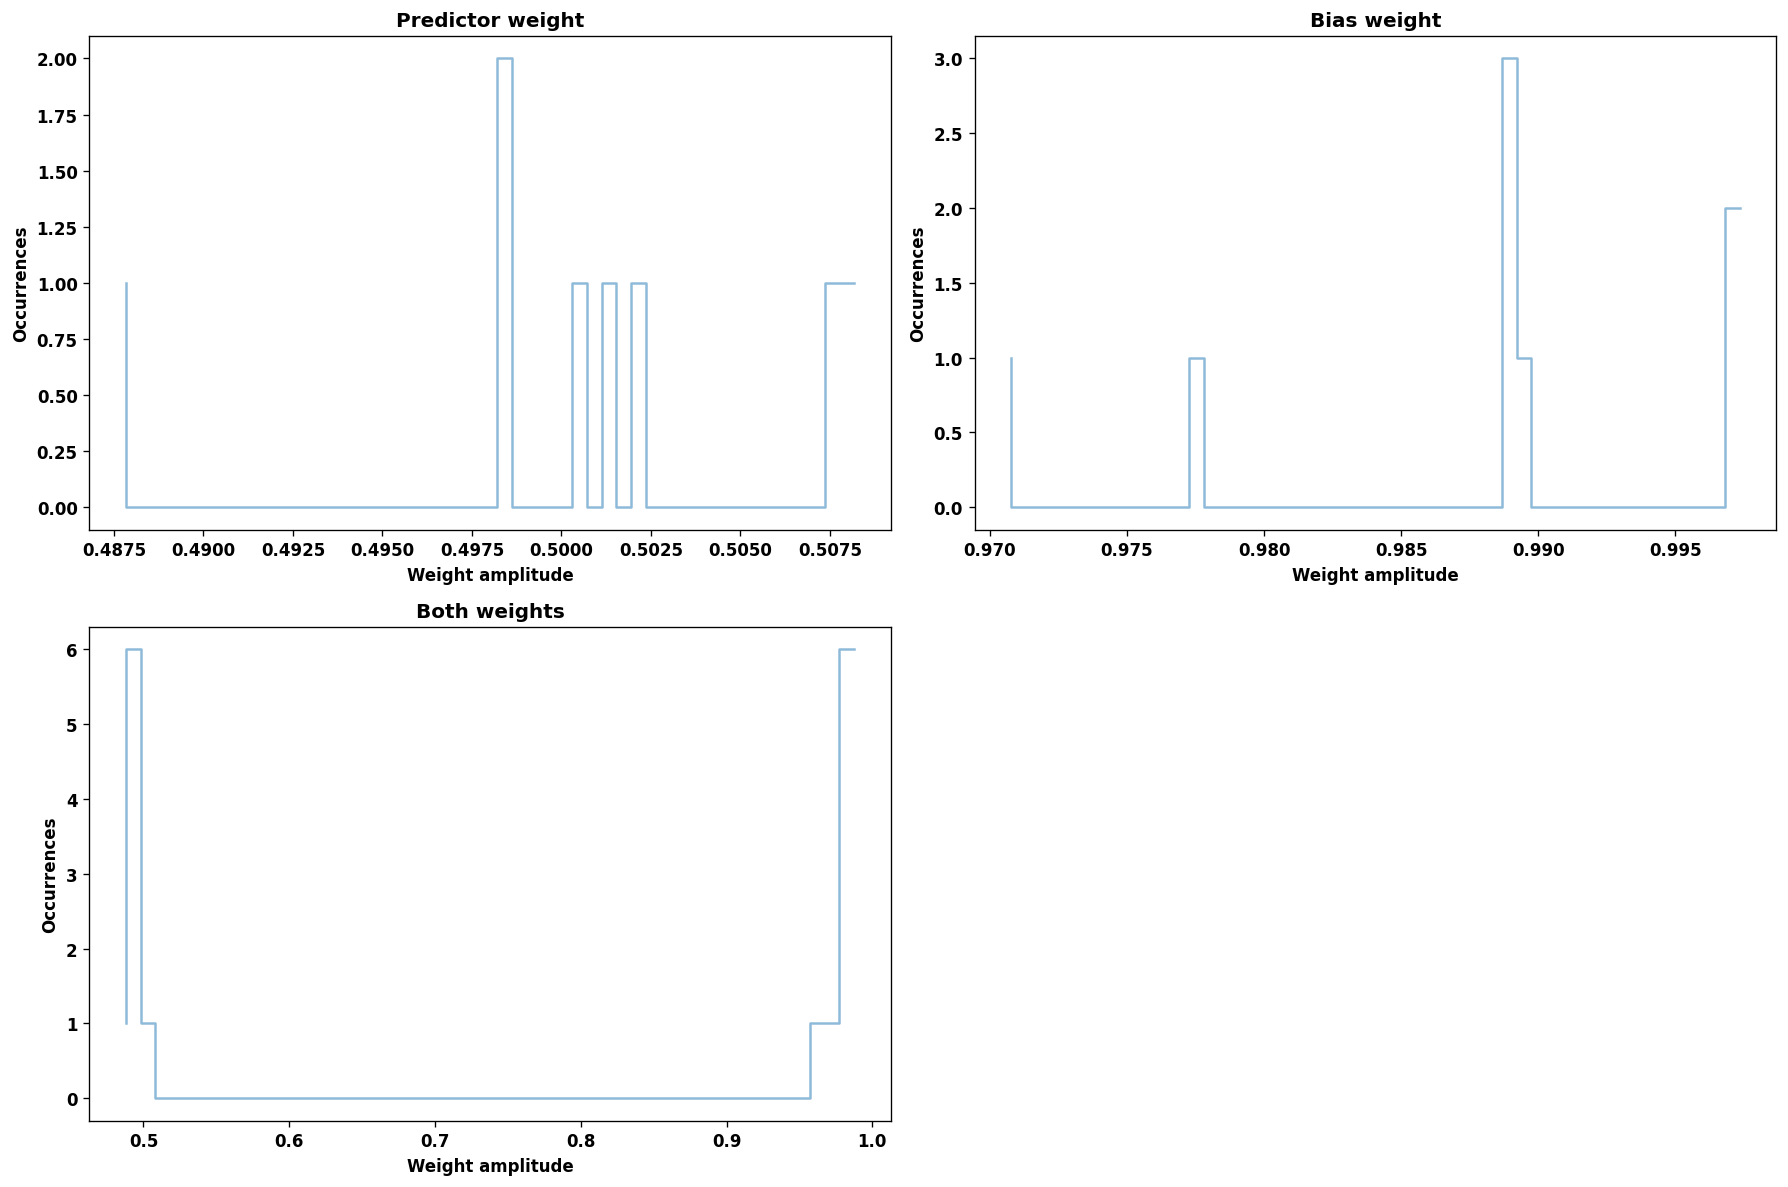

In [52]:
weights_distribution_histogram(path_analysis_dir, path_info_dir)